<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 2</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 25. April, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Newton Fraktal</td>
<td style="border-style: none; width: 1%; text-align: right">(2 Punkte)</td></tr></table>

Das Newtonverfahren lässt sich problemlos auch auf **komplexe Funktionen** erweitern, die eine vielfältige Struktur an Nullstellen aufweisen können. Insbesondere kann es Punkte geben, an denen der Algorithmus nicht konvergiert, ganz gleich wie die Parameter gewählt werden.

Für diese Aufgabe betrachten wir konkret die Funktion $g(z) = \cos{(z)} z^4 − 1$ auf der komplexen Menge $[−2, 2] \times [−2i, 2i]$. Das Ergebnis des Newtonverfahrens auf dieser Menge lässt sich sehr schön visualisieren. Dazu speichern wir für jeden Startpunkt aus der obigen Menge die Anzahl an Iterationschritten, die wir benötigen um mit vorgegebener Genauigkeit ε an 0 heranszukommen. Das bedeutet, wir diskretisieren die Menge, beginnen einen Newtonlauf an jedem der Punkte z0 und prüfen, ob nach dem i-ten Schritt $|f (z_i)| < \epsilon$ erfüllt ist. Falls dem so ist, speichern wir den Wert i und beginnen am nächsten Punkt von vorn. So erhalten wir für jeden Punkt der diskretisierten Menge einen Wert.

Zu guter Letzt müssen Sie diese Matrix nur noch visualisieren. Dies können Sie, wie schon im Tutorial erklärt, mit der Funktion *imshow* erledigen. Als guter Satz von Parametern hat sich eine Matrixgröße von 720 × 720, eine Maximalanzahl von 200 Iterationen pro Punkt, ein Diskretisierungsschritt der Ableitung von dh = 1e − 6 sowie einer Präzision ε = 1e − 10 herausgestellt. Gut bedeutet in diesem Fall, dass das Bild auf einem durchschnittlichen Computer innerhalb von fünf Minuten fertig berechnet sein sollte. Um ihren Algorithmus zu testen können Sie aber zunächst auch mit kleinerer Auflösung rechnen und dann erst am Ende ein höher aufgelöstes Bild generieren.

In [1]:
function newton(f, z, iterations, precision, step_size)
        for i in 1:iterations
        dz = (f(z + step_size) - f(z)) / step_size
        z = z - f(z)/dz
        
        if dz == 0 || abs(f(z)) < precision
            # z found with precision
            return (z, i)
        end
    end
    return (z, iterations)
end

newton (generic function with 1 method)

In [2]:
g(z) = cos(z) * z^4 - 1

iterations = 200
precision = 1e-10
step_size = 1e-6

width = 1000
height = 1000
fractal = zeros(width, height)

left = -2.0
right = 2.0
top = 2.0
bottom = -2.0

for x in 1:width
    for y in 1:height
        try
            init_z = x * (left - right) / (width - 1) + right + (y * (top - bottom) / (height - 1) + bottom)im
            fractal[x, y] = newton(g, init_z, iterations, precision, step_size)[2]
        catch e
        end
    end
end    

Nun müssen wir die Grafik noch darstellen, was mithilfe des folgenden Abschnitts geschieht:

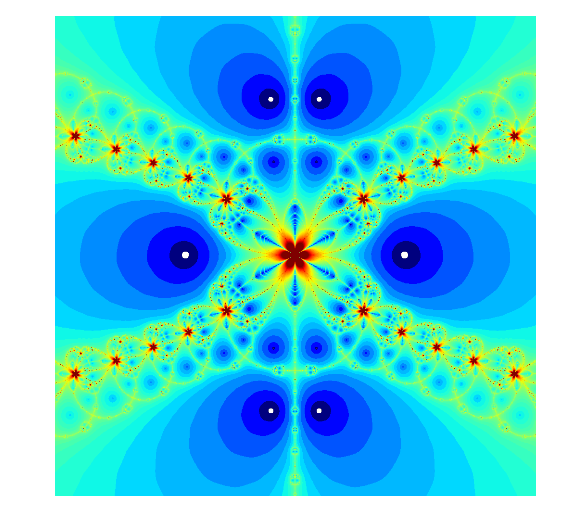

In [3]:
using PyPlot

# rescale values of image                                                                                           
sub = ones(width, height) * minimum(fractal)
fractal = fractal - sub
fractal = fractal / maximum(fractal)    

try
    imshow(log(fractal), cmap="viridis")
    catch e
    try
        imshow(log(fractal))
        catch ex
        imshow(fractal)
    end
end
axis("off")
savefig("newton_fractal.pdf")